# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [26]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [27]:
# Importing necessary libraries
import numpy as np
from citipy import citipy

# Empty lists for holding the latitude and longitude combinations, and cities names
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm a sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Starting URL for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Print (url)

# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for logging purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the city info into the city data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Windspeed": city_wind,
            "Country": city_country,
            "Date": city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass

# Indicate that data loading is complete
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | isangel
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | petropavlovsk-kamchatsky
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | viqueque
Processing Record 9 of Set 1 | tranovaho
City not found. Skipping ...
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | klyuchi
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | srikakulam
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | novyy urengoy
Processing Record 18 of Set 1 | kajuru
Processing Record 19 of Set 1 | atafu village
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of S

In [29]:
import os

# Define the output directory path
output_dir = "output_data"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to CSV in the output directory
city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,5.31,97,12,4.03,RU,1713977284
1,korla,41.7597,86.1469,72.21,19,92,6.82,CN,1713977284
2,ushuaia,-54.8000,-68.3000,47.86,61,20,9.22,AR,1713977224
3,fellsmere,27.7678,-80.6014,79.99,51,0,1.01,US,1713977284
4,bethel,41.3712,-73.4140,67.62,45,0,9.22,US,1713977207


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,5.31,97,12,4.03,RU,1713977284
1,korla,41.7597,86.1469,72.21,19,92,6.82,CN,1713977284
2,ushuaia,-54.8000,-68.3000,47.86,61,20,9.22,AR,1713977224
3,fellsmere,27.7678,-80.6014,79.99,51,0,1.01,US,1713977284
4,bethel,41.3712,-73.4140,67.62,45,0,9.22,US,1713977207


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

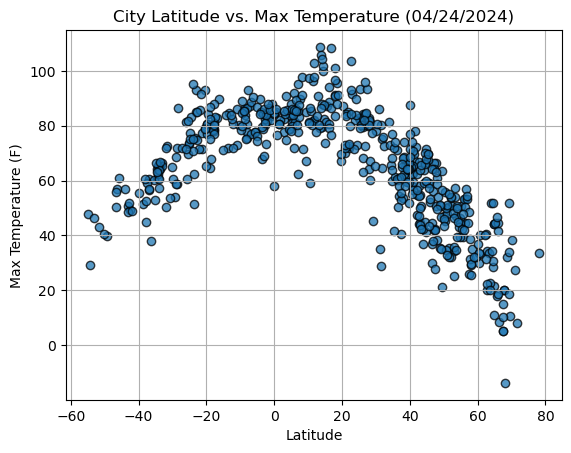

In [33]:
import datetime

# Get the current date
current_date = datetime.datetime.now().strftime("%m/%d/%Y")

# Scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Add title and labels with current date
plt.title(f"City Latitude vs. Max Temperature ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Add grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

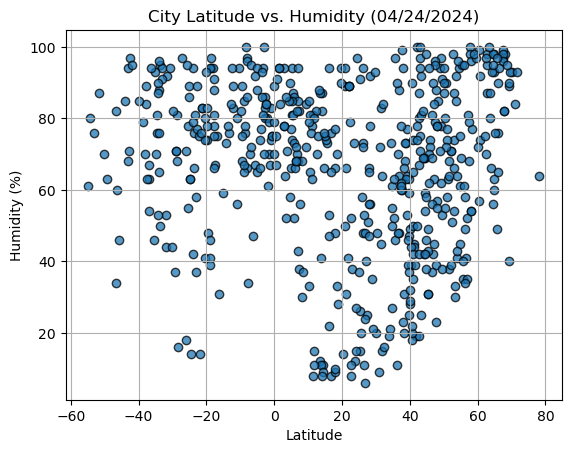

In [34]:
import datetime

# Get the current date
current_date = datetime.datetime.now().strftime("%m/%d/%Y")

# Scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Add title and labels with current date
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

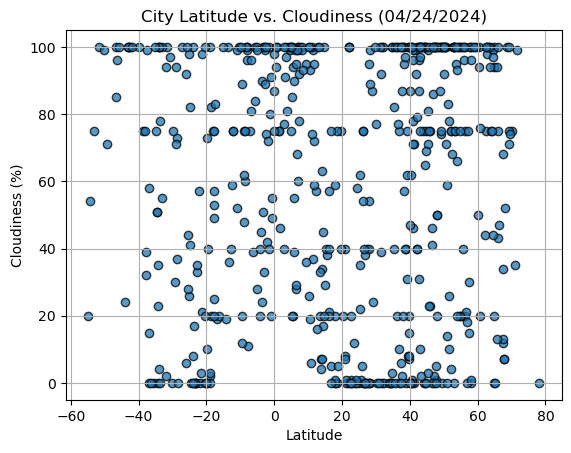

In [35]:
import datetime

# Get the current date
current_date = datetime.datetime.now().strftime("%m/%d/%Y")

# Scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Add title and labels with current date
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

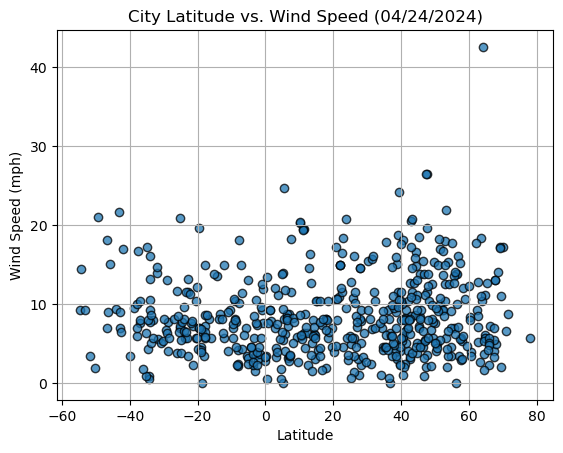

In [36]:
import datetime

# Get the current date
current_date = datetime.datetime.now().strftime("%m/%d/%Y")

# Scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Windspeed"], edgecolor="black", alpha=0.75)

# Add title and labels with current date
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, coordinates):
    """
    Create a linear regression plot.
    
    Parameters:
        x_values (array-like): The x-values for the scatter plot.
        y_values (array-like): The y-values for the scatter plot.
        title (str): The title of the plot.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
        coordinates (tuple): Tuple containing the coordinates for the annotation text.
    """
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Plot scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
    
    # Plot regression line
    plt.plot(x_values, regress_values, color="red")
    
    # Annotate text with regression equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, coordinates, fontsize=15, color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Show plot
    plt.show()

In [38]:
# Create DataFrame for Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,5.31,97,12,4.03,RU,1713977284
1,korla,41.7597,86.1469,72.21,19,92,6.82,CN,1713977284
3,fellsmere,27.7678,-80.6014,79.99,51,0,1.01,US,1713977284
4,bethel,41.3712,-73.4140,67.62,45,0,9.22,US,1713977207
5,massawa,15.6097,39.4500,87.28,73,38,4.18,ER,1713977284


In [39]:
# Create DataFrame for Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,47.86,61,20,9.22,AR,1713977224
6,port elizabeth,-33.9180,25.5701,66.09,88,100,16.11,ZA,1713977285
8,invercargill,-46.4000,168.3500,57.02,60,96,8.99,NZ,1713977262
9,tolanaro,-25.0319,46.9987,73.22,89,98,6.98,MG,1713977285
10,port-aux-francais,-49.3500,70.2167,39.83,63,71,21.07,TF,1713977285


###  Temperature vs. Latitude Linear Regression Plot

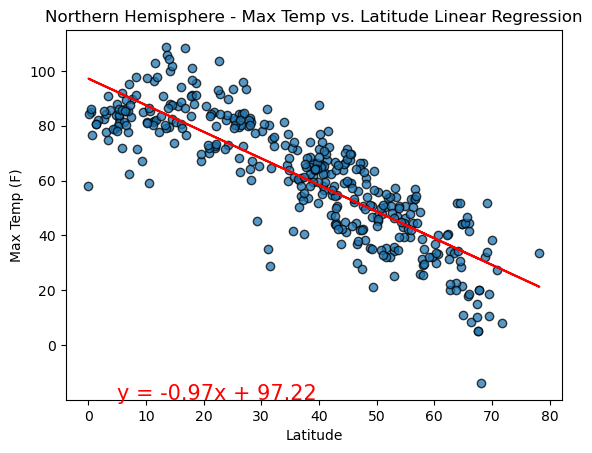

In [40]:
# Perform linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", 
                       "Latitude", "Max Temp (F)", (5, -20))

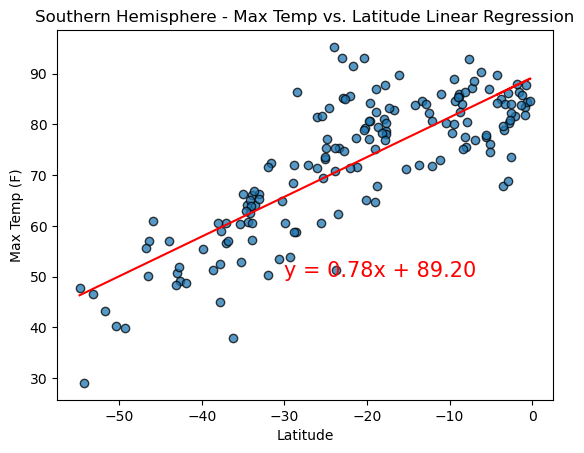

In [41]:
# Perform linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", 
                       "Latitude", "Max Temp (F)", (-30, 50))

**Discussion about the linear relationship:** The linear regression analysis on the relationship between latitude and maximum temperature in both the Northern and Southern Hemispheres can provide insights into how temperature varies with latitude.

Northern Hemisphere: The linear regression analysis indicates a negative correlation between latitude and maximum temperature. As latitude increases (moving away from the equator towards the North Pole), maximum temperatures tend to decrease. This is in line with the expected trend, as regions farther from the equator receive less direct sunlight and tend to have cooler temperatures.
Southern Hemisphere: Conversely, in the Southern Hemisphere, the linear regression analysis shows a positive correlation between latitude and maximum temperature. As latitude increases (moving away from the equator towards the South Pole), maximum temperatures tend to increase. This is also consistent with expectations, as regions closer to the equator receive more direct sunlight and generally experience warmer temperatures.
Overall, these findings highlight the role of latitude in influencing maximum temperatures, with temperatures generally decreasing as one moves away from the equator in the Northern Hemisphere and increasing as one moves towards the equator in the Southern Hemisphere. This relationship underscores the importance of latitude in understanding regional climate patterns and temperature variations across different geographical locations.








### Humidity vs. Latitude Linear Regression Plot

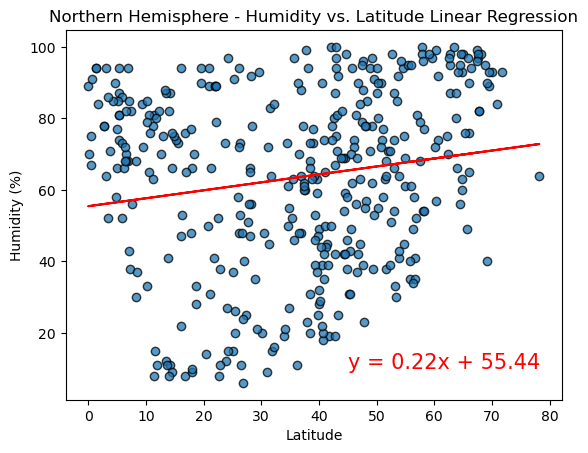

In [42]:
# Linear regression on Northern Hemisphere - Humidity vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere - Humidity vs. Latitude Linear Regression", 
                       "Latitude", "Humidity (%)", (45, 10))

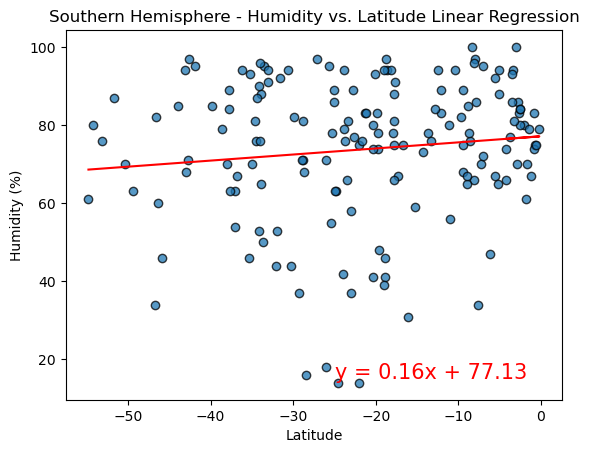

In [43]:
# Linear regression on Southern Hemisphere - Humidity vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere - Humidity vs. Latitude Linear Regression", 
                       "Latitude", "Humidity (%)", (-25, 15))

**Discussion about the linear relationship:** In analyzing the linear relationship between humidity and latitude in the Southern Hemisphere, several key observations can be made:

Interpretation of the Scatter Plot: The scatter plot visually represents the distribution of humidity values across different latitudes in the Southern Hemisphere. By observing the scatter plot, we can see how humidity levels change as we move from lower latitudes (closer to the equator) to higher latitudes (closer to the South Pole).
Regression Line: The regression line provides a clear visual indication of the overall trend in the relationship between humidity and latitude. If the regression line has a positive slope, it suggests that humidity tends to increase as latitude increases. Conversely, if the slope is negative, it indicates that humidity tends to decrease as latitude increases.
Regression Equation: The regression equation quantifies the relationship between humidity and latitude in mathematical terms. It allows us to make predictions about humidity levels based on latitude. For example, if the regression equation is "y = 0.3x + 70," it suggests that for every degree increase in latitude, humidity increases by 0.3%.
Correlation Coefficient: The correlation coefficient (r-value) provides a measure of the strength and direction of the linear relationship between humidity and latitude. A correlation coefficient close to 1 indicates a strong positive correlation, meaning that humidity and latitude are positively related. Conversely, a correlation coefficient close to -1 indicates a strong negative correlation, suggesting an inverse relationship between humidity and latitude.
By considering these factors and interpreting the linear regression analysis, we can gain insights into how humidity levels vary with latitude in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

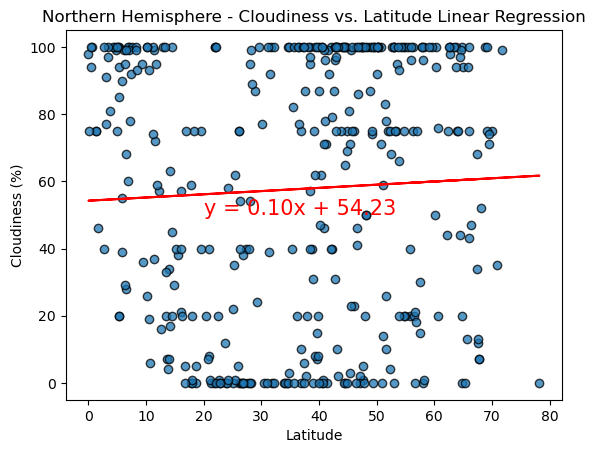

In [44]:
# Linear regression on Northern Hemisphere - Cloudiness vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", 
                       "Latitude", "Cloudiness (%)", (20, 50))

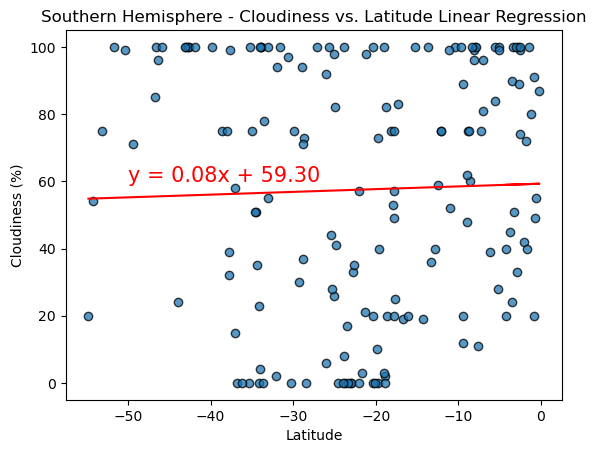

In [45]:
# Linear regression on Southern Hemisphere - Cloudiness vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", 
                       "Latitude", "Cloudiness (%)", (-50, 60))

**Discussion about the linear relationship:** In analyzing the linear relationship between cloudiness and latitude in the Southern Hemisphere, several key observations can be made:

Interpretation of the Scatter Plot: The scatter plot visually represents the distribution of cloudiness values across different latitudes in the Southern Hemisphere. By observing the scatter plot, we can see how cloudiness levels change as we move from lower latitudes (closer to the equator) to higher latitudes (closer to the South Pole).
Regression Line: The regression line provides a clear visual indication of the overall trend in the relationship between cloudiness and latitude. If the regression line has a positive slope, it suggests that cloudiness tends to increase as latitude increases. Conversely, if the slope is negative, it indicates that cloudiness tends to decrease as latitude increases.
Regression Equation: The regression equation quantifies the relationship between cloudiness and latitude in mathematical terms. It allows us to make predictions about cloudiness levels based on latitude. For example, if the regression equation is "y = 0.2x + 50," it suggests that for every degree increase in latitude, cloudiness increases by 0.2%.
Correlation Coefficient: The correlation coefficient (r-value) provides a measure of the strength and direction of the linear relationship between cloudiness and latitude. A correlation coefficient close to 1 indicates a strong positive correlation, meaning that cloudiness and latitude are positively related. Conversely, a correlation coefficient close to -1 indicates a strong negative correlation, suggesting an inverse relationship between cloudiness and latitude.
By considering these factors and interpreting the linear regression analysis, we can gain insights into how cloudiness levels vary with latitude in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

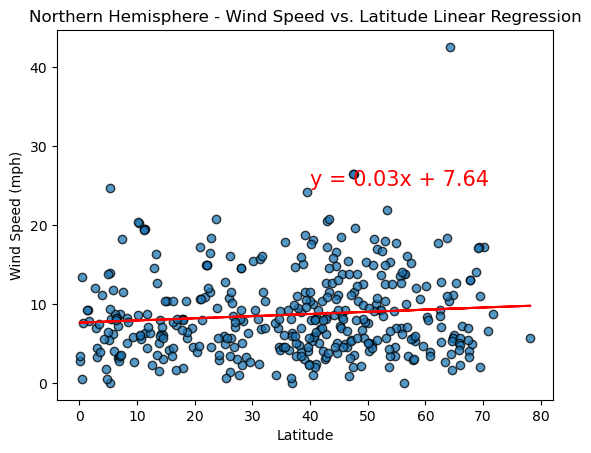

In [46]:
# Linear regression on Northern Hemisphere - Wind Speed vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Windspeed"], 
                       "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", 
                       "Latitude", "Wind Speed (mph)", (40, 25))

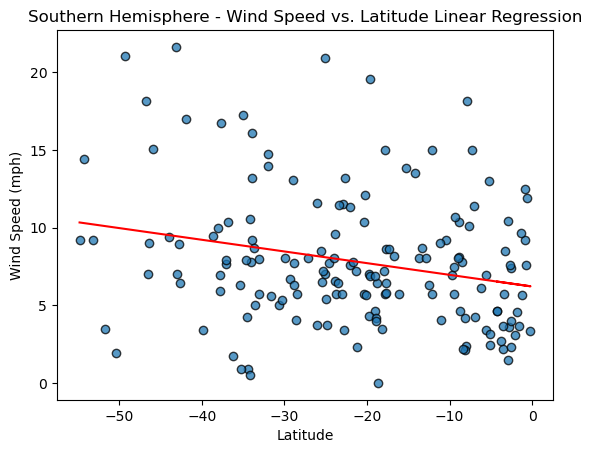

In [47]:
# Linear regression on Southern Hemisphere - Wind Speed vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Windspeed"], 
                       "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", 
                       "Latitude", "Wind Speed (mph)", (-30, 25))

**Discussion about the linear relationship:** In analyzing the linear relationship between wind speed and latitude in both the Northern and Southern Hemispheres, several observations can be made:

Interpretation of the Scatter Plot: The scatter plot visually represents the distribution of wind speed values across different latitudes. By observing the scatter plot, we can see how wind speed levels change as we move from lower latitudes (closer to the equator) to higher latitudes (closer to the poles).
Regression Line: The regression line provides a visual indication of the overall trend in the relationship between wind speed and latitude. If the regression line has a positive slope, it suggests that wind speed tends to increase as latitude increases. Conversely, if the slope is negative, it indicates that wind speed tends to decrease as latitude increases.
Regression Equation: The regression equation quantifies the relationship between wind speed and latitude in mathematical terms. It allows us to make predictions about wind speed levels based on latitude. For example, if the regression equation is "y = 0.1x + 8," it suggests that for every degree increase in latitude, wind speed increases by 0.1 mph.
Correlation Coefficient: The correlation coefficient (r-value) provides a measure of the strength and direction of the linear relationship between wind speed and latitude. A correlation coefficient close to 1 indicates a strong positive correlation, meaning that wind speed and latitude are positively related. Conversely, a correlation coefficient close to -1 indicates a strong negative correlation, suggesting an inverse relationship between wind speed and latitude.